In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
path =r"C:\Users\HP\Downloads\Major Project Dataset (Wine Classification).xlsx"
df = pd.read_excel(path)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1598
density                 1599
pH                      1598
sulphates               1599
alcohol                 1599
quality                 1598
dtype: int64

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [9]:
df[df['total sulfur dioxide'].isna()|df['pH'].isna()|df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=5)

In [12]:
df[['quality']] = imputer.fit_transform(df[['quality']])

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.shape

(1597, 12)

In [16]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,8.321165,0.527780,0.270958,2.536976,0.087482,15.879148,46.423294,0.996746,3.498679,0.658109,10.423638,5.636591
std,1.741594,0.179156,0.194904,1.407900,0.047092,10.464814,32.884237,0.001888,0.080285,0.169565,1.065963,0.807710
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255987,0.671949,0.115536,0.093533,-0.154282,-0.112555,0.668587,0.027037,0.183099,-0.062304,0.124089
volatile acidity,-0.255987,1.000000,-0.552453,0.002314,0.061330,-0.010254,0.076562,0.022041,-0.046686,-0.260855,-0.202030,-0.390489
citric acid,0.671949,-0.552453,1.000000,0.143075,0.203917,-0.061173,0.035180,0.364887,0.008954,0.312560,0.109725,0.226124
residual sugar,0.115536,0.002314,0.143075,1.000000,0.056231,0.187086,0.201100,0.355208,0.043071,0.004083,0.041764,0.015165
chlorides,0.093533,0.061330,0.203917,0.056231,1.000000,0.005502,0.047872,0.200800,-0.259338,0.371516,-0.221332,-0.129171
free sulfur dioxide,-0.154282,-0.010254,-0.061173,0.187086,0.005502,1.000000,0.668540,-0.021926,-0.025293,0.051408,-0.069947,-0.050653
total sulfur dioxide,-0.112555,0.076562,0.035180,0.201100,0.047872,0.668540,1.000000,0.070715,-0.162776,0.042251,-0.205688,-0.184849
density,0.668587,0.022041,0.364887,0.355208,0.200800,-0.021926,0.070715,1.000000,-0.037343,0.148310,-0.496341,-0.174556
pH,0.027037,-0.046686,0.008954,0.043071,-0.259338,-0.025293,-0.162776,-0.037343,1.000000,-0.259891,0.233813,0.133194
sulphates,0.183099,-0.260855,0.312560,0.004083,0.371516,0.051408,0.042251,0.148310,-0.259891,1.000000,0.093312,0.251753


In [18]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.000000,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.520000,0.570000,9.955000
4.000000,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.485660,0.596415,10.265094
5.000000,8.168483,0.576959,0.243873,2.523490,0.092786,16.992636,56.480118,0.997102,3.485346,0.620839,9.899411
5.636421,8.000000,0.710000,0.000000,2.600000,0.080000,11.000000,34.000000,0.997600,3.440000,0.530000,9.500000
6.000000,8.349765,0.497292,0.273925,2.478100,0.084965,15.723705,40.836735,0.996614,3.508100,0.675479,10.631606
7.000000,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.514774,0.741256,11.465913
8.000000,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.520000,0.767778,12.094444


#Data Analysis

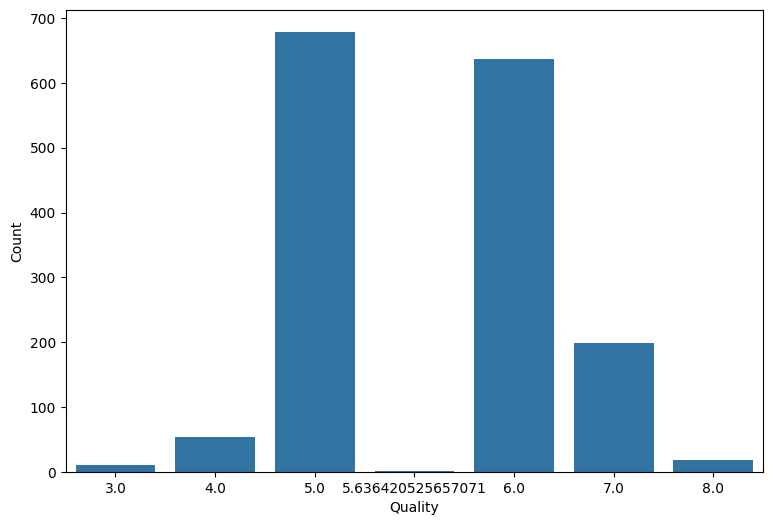

In [19]:
plt.figure(figsize=(9,6))
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

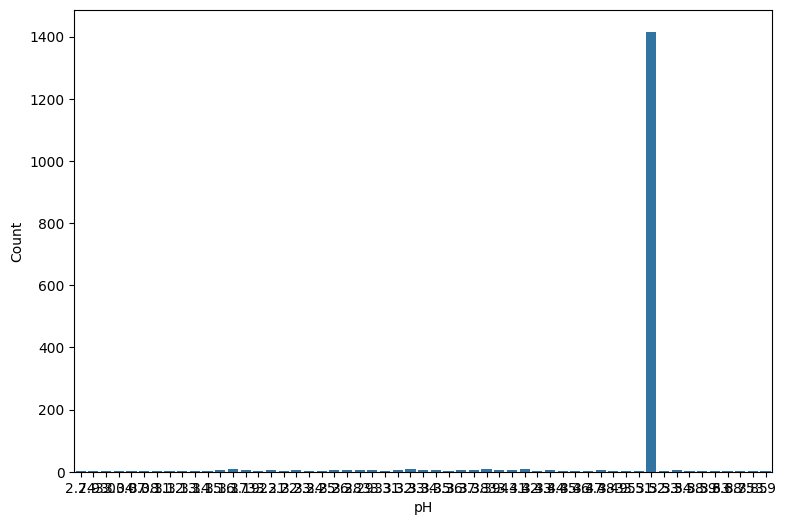

In [20]:
plt.figure(figsize=(9,6))
sns.countplot(x='pH', data=df)
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

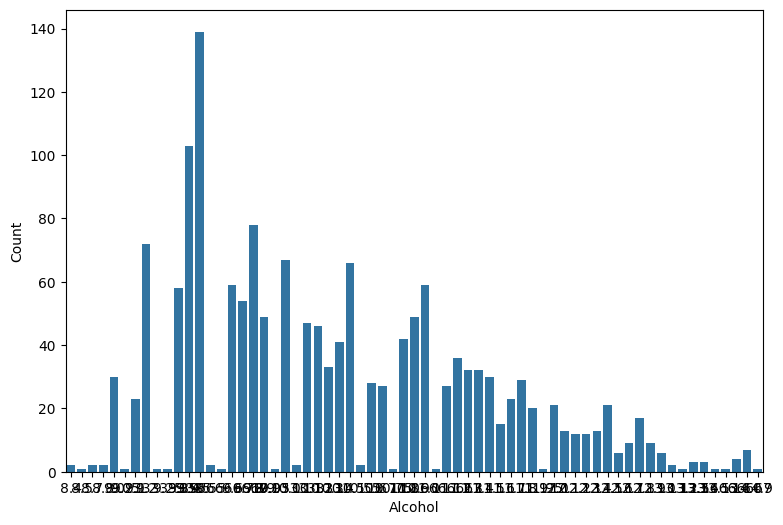

In [21]:
plt.figure(figsize=(9,6))
sns.countplot(x='alcohol', data=df)
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

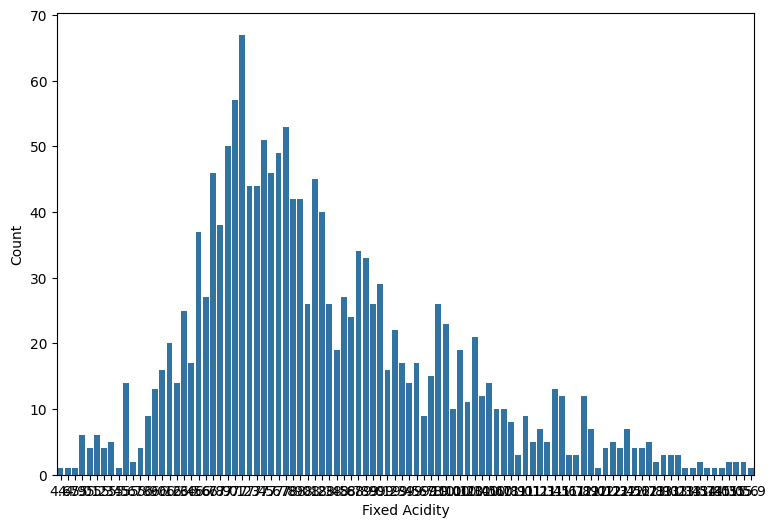

In [22]:
plt.figure(figsize=(9,6))
sns.countplot(x='fixed acidity', data=df)
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.show()

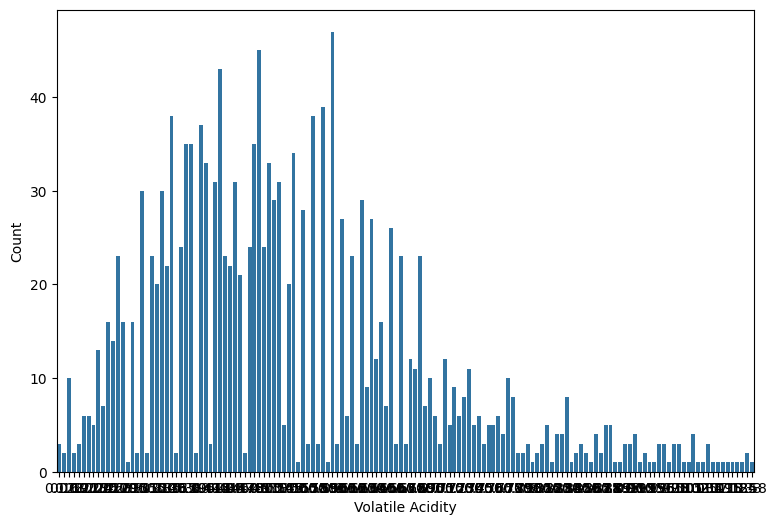

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(x='volatile acidity', data=df)
plt.xlabel('Volatile Acidity')
plt.ylabel('Count')
plt.show()

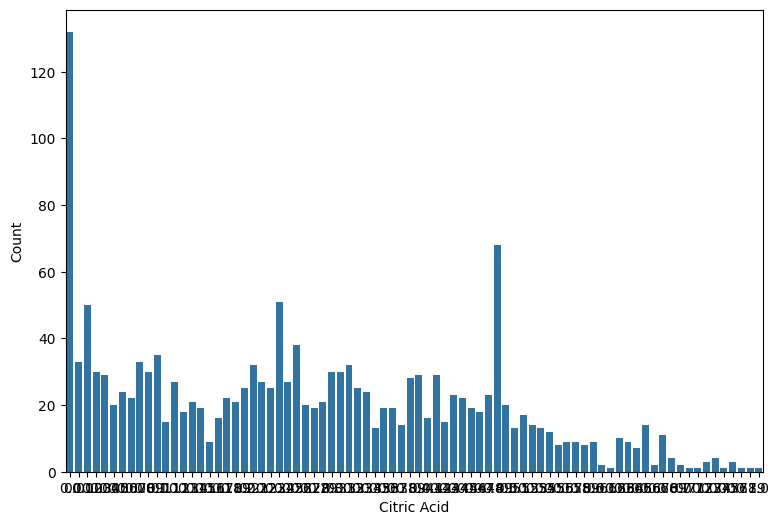

In [24]:
plt.figure(figsize=(9,6))
sns.countplot(x='citric acid', data=df)
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.show()

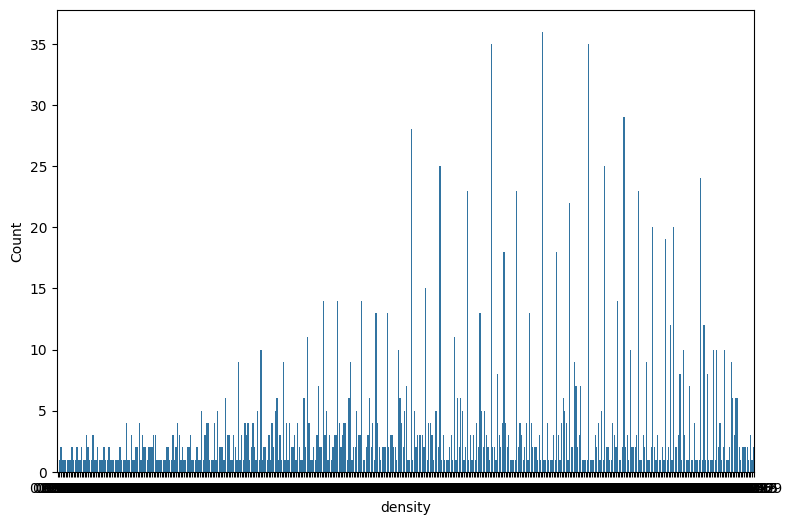

In [25]:
plt.figure(figsize=(9,6))
sns.countplot(x='density', data=df)
plt.xlabel('density')
plt.ylabel('Count')
plt.show()

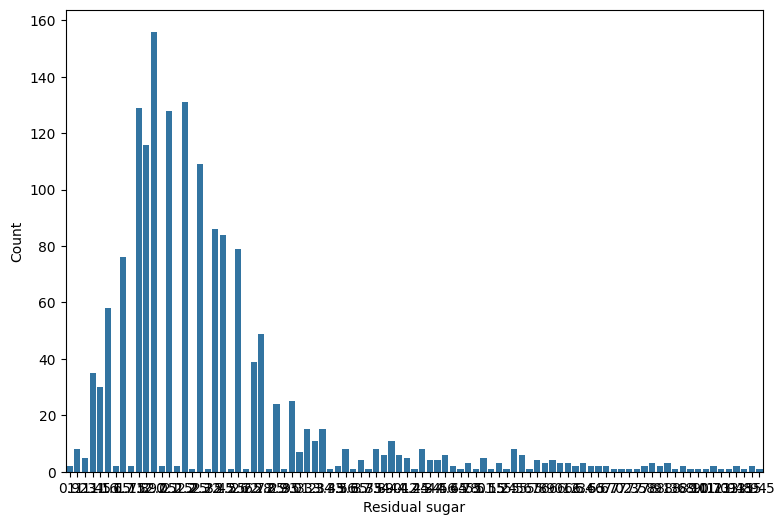

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(x='residual sugar', data=df)
plt.xlabel('Residual sugar')
plt.ylabel('Count')
plt.show()

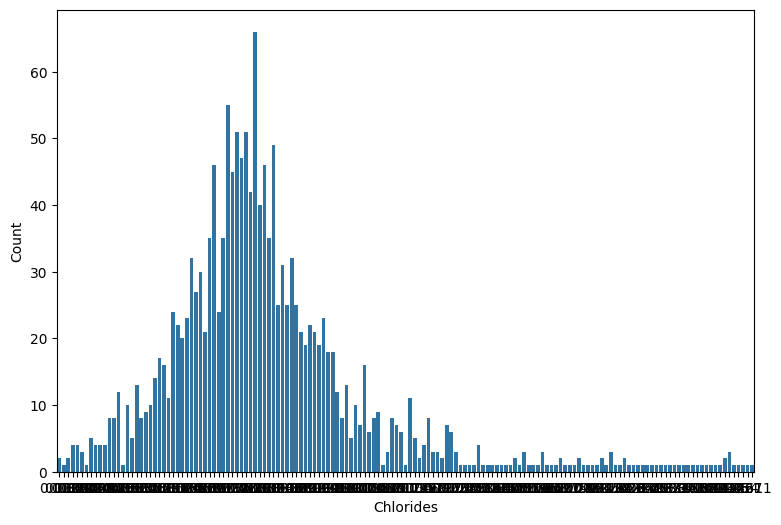

In [27]:
plt.figure(figsize=(9,6))
sns.countplot(x='chlorides', data=df)
plt.xlabel('Chlorides')
plt.ylabel('Count')
plt.show()

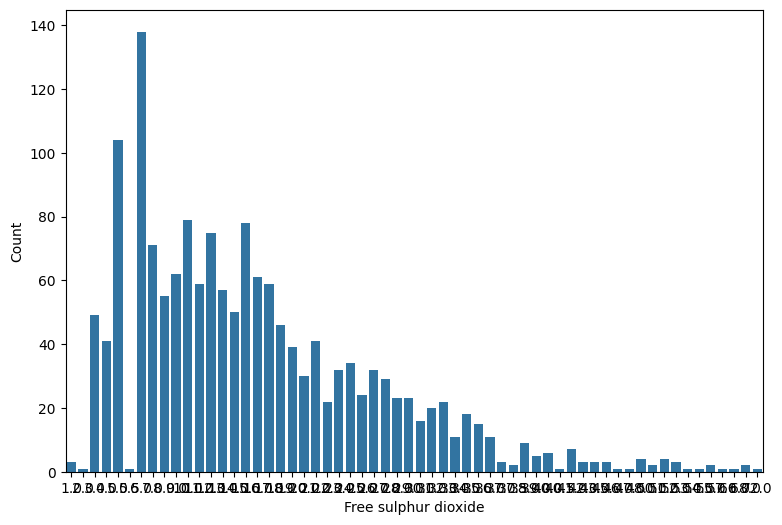

In [28]:
plt.figure(figsize=(9,6))
sns.countplot(x='free sulfur dioxide', data=df)
plt.xlabel('Free sulphur dioxide')
plt.ylabel('Count')
plt.show()

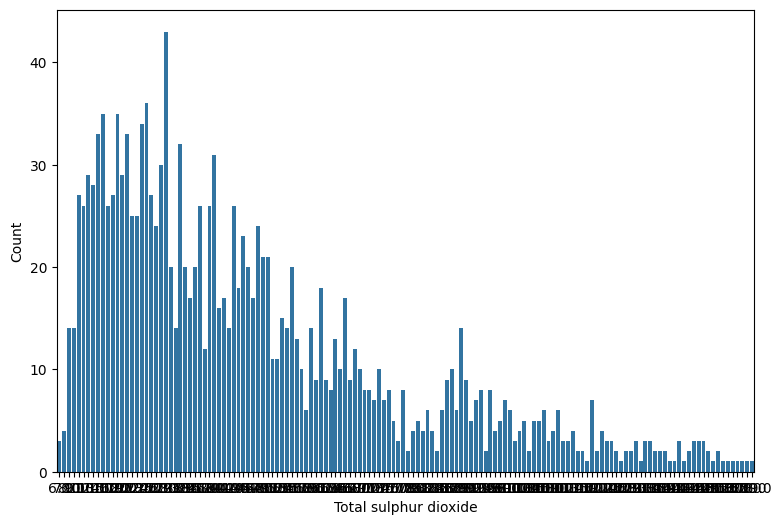

In [29]:
plt.figure(figsize=(9,6))
sns.countplot(x='total sulfur dioxide', data=df)
plt.xlabel('Total sulphur dioxide')
plt.ylabel('Count')
plt.show()

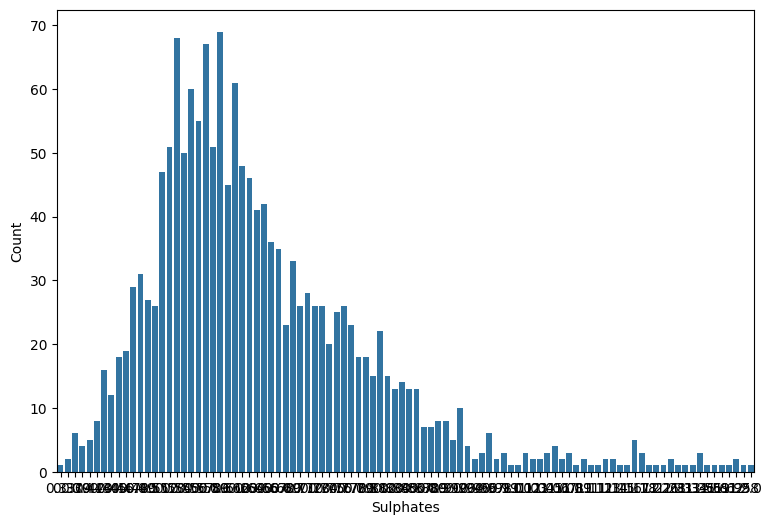

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(x='sulphates', data=df)
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.show()

fixed acidity              Axes(0.125,0.653529;0.168478x0.226471)
volatile acidity        Axes(0.327174,0.653529;0.168478x0.226471)
citric acid             Axes(0.529348,0.653529;0.168478x0.226471)
residual sugar          Axes(0.731522,0.653529;0.168478x0.226471)
chlorides                  Axes(0.125,0.381765;0.168478x0.226471)
free sulfur dioxide     Axes(0.327174,0.381765;0.168478x0.226471)
total sulfur dioxide    Axes(0.529348,0.381765;0.168478x0.226471)
density                 Axes(0.731522,0.381765;0.168478x0.226471)
pH                             Axes(0.125,0.11;0.168478x0.226471)
sulphates                   Axes(0.327174,0.11;0.168478x0.226471)
alcohol                     Axes(0.529348,0.11;0.168478x0.226471)
quality                     Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

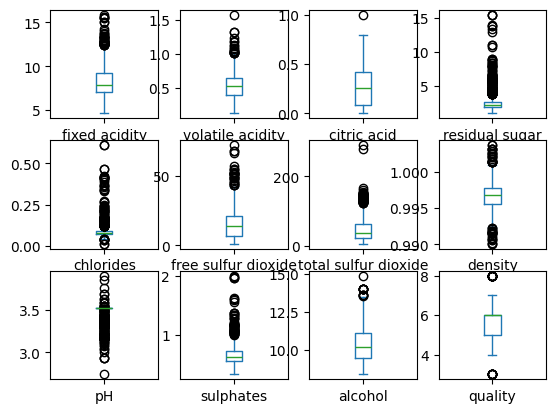

In [31]:
df.plot(kind ='box',subplots = True, layout =(3,4),sharex = False)


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

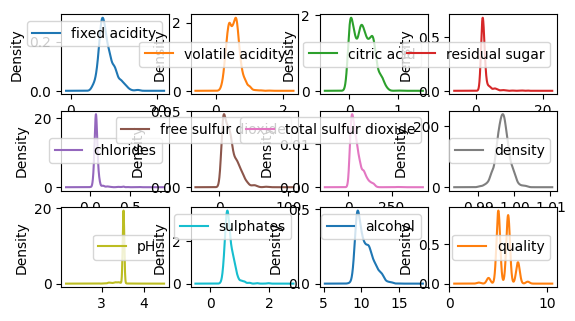

In [32]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)


<Axes: >

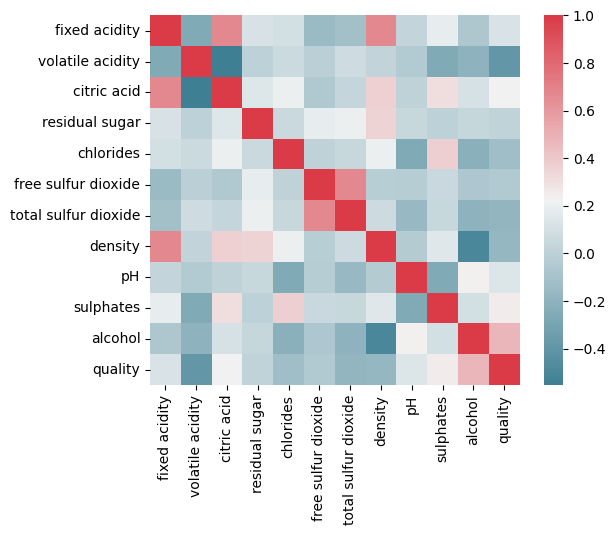

In [33]:
corr = df.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

From the above plot we can have the idea about which of the items are strongly or weakly correlated.

Strongly correlated items:

In [34]:
strong_corr = corr[(corr.abs() > 0.5) & (corr != 1.0)].stack().reset_index()

In [35]:
print(strong_corr)

                level_0               level_1         0
0         fixed acidity           citric acid  0.671949
1         fixed acidity               density  0.668587
2      volatile acidity           citric acid -0.552453
3           citric acid         fixed acidity  0.671949
4           citric acid      volatile acidity -0.552453
5   free sulfur dioxide  total sulfur dioxide  0.668540
6  total sulfur dioxide   free sulfur dioxide  0.668540
7               density         fixed acidity  0.668587


Weakly correlated items:

In [36]:
weak_corr = corr[(corr.abs() <0.3)].stack().reset_index()

In [37]:
print(weak_corr)

           level_0               level_1         0
0    fixed acidity      volatile acidity -0.255987
1    fixed acidity        residual sugar  0.115536
2    fixed acidity             chlorides  0.093533
3    fixed acidity   free sulfur dioxide -0.154282
4    fixed acidity  total sulfur dioxide -0.112555
..             ...                   ...       ...
105        quality   free sulfur dioxide -0.050653
106        quality  total sulfur dioxide -0.184849
107        quality               density -0.174556
108        quality                    pH  0.133194
109        quality             sulphates  0.251753

[110 rows x 3 columns]


In [38]:
#Classfication
df['goodquality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [39]:
df['goodquality'].value_counts()

goodquality
0    1380
1     217
Name: count, dtype: int64

In [40]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [42]:
log_reg = LogisticRegression(max_iter=500)  
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [43]:
y_pred = log_reg.predict(X_test)

In [44]:
accuracy_log = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy_log}")

Accuracy:0.88125


In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)


In [48]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn}")

Accuracy: 0.8604166666666667


In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf_model.predict(X_test)

In [53]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf}")

Accuracy: 0.93125


In [54]:
result= pd.DataFrame(
    {
        'Model':['Logistic Regression','KNN','Random Forest'],
        'Accuracy':[0.881,0.8747,0.9018]
    }
)
result

,Model,Accuracy
0,Logistic Regression,0.8810
1,KNN,0.8747
2,Random Forest,0.9018


In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
voting_model = VotingClassifier(estimators=[
    ('logistic', log_reg),
    ('knn', knn),
    ('rf', rf_model)],
    voting='hard'  
)

In [57]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=500)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))])

In [58]:
y_pred = voting_model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

Voting Classifier Accuracy: 0.90


Combining the predictions of other models leads to increase in accuracy and also reduces overfitting and increases robustness.